<a href="https://colab.research.google.com/github/Hoon-Code/study_Machine-Deep/blob/main/study_md_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
회귀문제는 예측하는 문제임으로 stratify를 사용하지 않음
사이킷런의 모델들은 입력데이터가 2차원배열이여야 함으로 1차원 배열 2차원으로 만들어줘야함
train_input.reshape(-1,1)을 사용사 원래 1차원 배열인 [1,2,3]이 2차원의 3행 1열 배열로 바뀜 -> 뒤에 열을 1로 지정해줘서 나머지 남은 배열이 행으로 감
mean_absolute_error을 사용하면 평균 절대값 오차를 구해줌
test_prediction = knr.predict(test_input)을 통해 test_input의 예측값 구함
mae = mean_absolute_error(test_target, test_prediction)을 통해 target값과 예측값의 평균 절대값 오차 구해줌
훈련세트를 적절히 훈련시키지 못했다 -> 훈련세트보다 테스트 세트의 점수가 높다 = 과소적합(k값을 너무 높게 잡으면 과소 적합-> 결과가 1개만 나오는 경우도 나옴 )
훈련세트보다 테스트 세트의 점수가 현저히 낮게 나온다 -> 과대 적합(k-neighbors에서 이웃 갯수 1로 놓으면 과대적합)


In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Text(0, 0.5, 'weight')

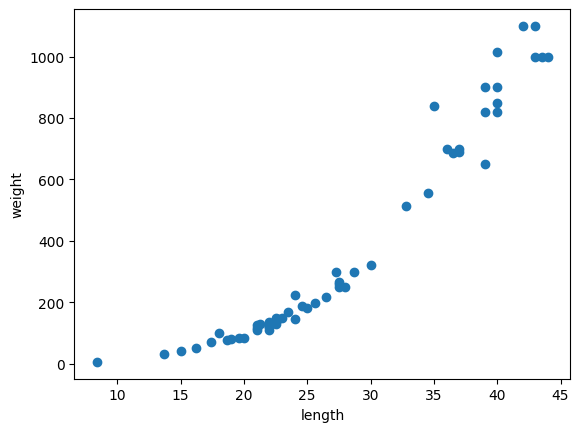

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

In [5]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight)

In [6]:
test_array=np.array([1,2,3,4])
test_array.shape

(4,)

In [7]:
test_array = test_array.reshape(2,2)
test_array

array([[1, 2],
       [3, 4]])

In [8]:
train_input =train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
knr.score(test_input,test_target)

0.9768077969431821

In [12]:
from sklearn.metrics import mean_absolute_error

In [13]:
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target,test_prediction)

print(mae)

36.892857142857146


In [14]:
print(knr.score(train_input,train_target))

0.9806433409379076


In [15]:
knr.n_neighbors = 3

In [16]:
knr.fit(train_input,train_target)
knr.score(train_input,train_target)

0.979968691564567

In [17]:
knr.score(test_input,test_target)

0.9640851864833577

In [18]:
######

In [22]:
knr = KNeighborsRegressor()

x=np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input,train_target)
  prediction=knr.predict(x)

Text(0, 0.5, 'weight')

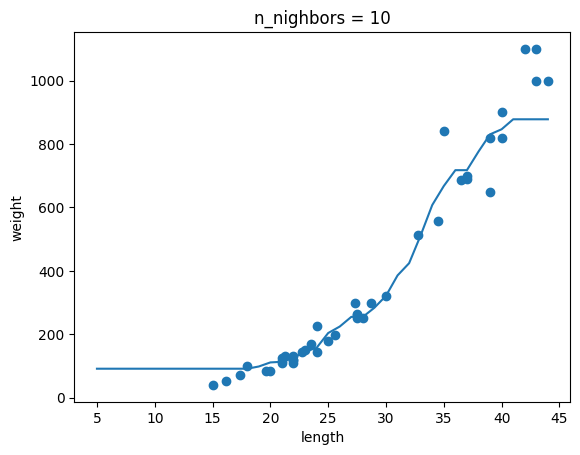

In [23]:
plt.scatter(train_input,train_target)
plt.plot(x,prediction)
plt.title('n_nighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')